# SageMath 基礎：4 圖形繪製
繪製單變數或雙變數的函數，或是數據序列，有助於理解數學或物理現象，並幫助我們進行猜想。在本章中，我們將通過幾個例子來展示 Sage 的圖形繪製功能。

## 4.1 2D 圖形
平面曲線有多種定義方式：可以是作為函數的圖形，來自參數方程組，使用極坐標，或者通過隱式方程定義。我們將詳細說明這四種情況，並給出一些數據可視化的例子。

### 4.1.1 函數的圖形表示
要繪製符號函數或 Python 函數在區間 $\left[ a,b\right]$ 上的圖形，可以使用方法 `plot(f(x), a, b)`，或使用替代語法 `plot(f(x), x, a, b)`：

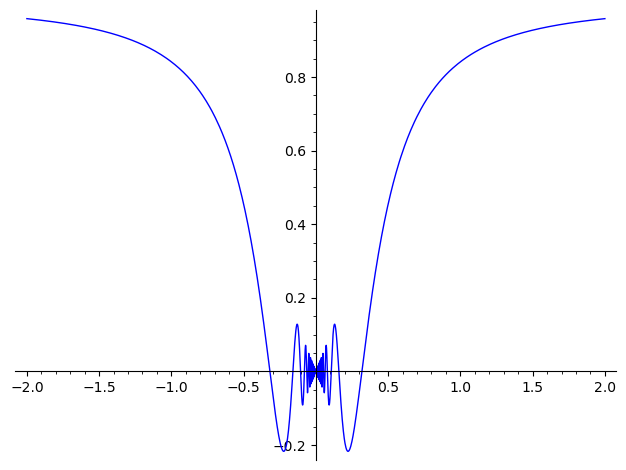

In [1]:
plot(x * sin(1/x), x, -2, 2, plot_points=500)

在方法 `plot` 方法的眾多選項中，我們提到以下幾個：

* `plot_points`（預設值 200）：計算的最小點數；
* `xmin` 和 `xmax`：顯示函數的區間邊界；
* `color`：圖形的顏色，可以是 RGB 三元組、字串（如 '`blue`'），或 HTML 顏色代碼（如 '`#aaff0b`'）；
* `detect_poles`（預設值為 `False`）：啟用時，會在函數的極點處繪製垂直漸近線。
* `alpha`：線條透明度；
* `thickness`：線條粗細；
* `linestyle`：線條樣式，可以使用 '`:`' 表示虛線，'`-.`' 表示點劃線，或使用預設值 '`-`' 表示實線。

要顯示圖形，我們可以將圖形對象定義值給變數（例如 $g$），然後使用方法 `show` 來顯示；此外，我們還可以為 $y$ 軸設定範圍（例如 `g.show(ymin=-1, ymax=3)`），或者設定長寬比（例如 `g.show(aspect_ratio=1)` 使 $x$ 和 $y$ 軸具有相同的比例）。

生成的圖形可以使用方法 `save` 將其匯出為多種格式，這些格式由副檔名決定，包括 .pdf、.png、.ps、.eps、.svg 和 .sobj：

> * 若要在 LaTeX 文件中使用 `\includegraphics` 命令插入這樣的圖形，如果文件是用 Latex 編譯的，應使用 .eps 副檔名（封裝後的 PostScript）；如果文件是用 pdflatex 編譯的，則應使用 .pdf 附檔名（相較於 .png 可以獲得更好的解析度）。

讓我們在同一張圖中繪製正弦函數及其在 0 點處的第一個泰勒多項式。

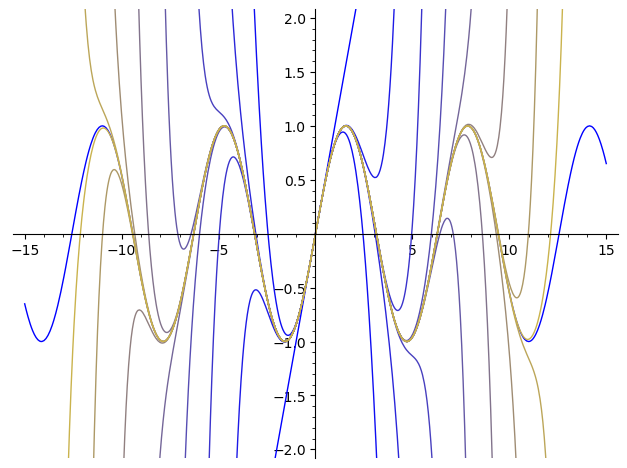

In [1]:
# 定義 p(x, n) 為 sin(x) 的泰勒級數展開，n 為展開的階數
def p(x, n):
    return(taylor(sin(x), x, 0, n))
    
xmax = 15 ; n = 15
g = plot(sin(x), x, -xmax, xmax)
for d in range(n):
    g += plot(p(x, 2 * d + 1), x, -xmax, xmax, color=(1.7*d/(2*n), 1.5*d/(2*n), 1-3*d/(4*n)))
g.show(ymin=-2, ymax=2)

In [5]:
#a = animate([[sin(x), taylor(sin(x), x, 0, 2*k+1)] for k in range(0, 14)], xmin=-14, xmax=14,ymin=-3, ymax=3, figsize=[8, 4])
#a.show()
#a.save('animation.gif')

> 執行上一個範例前，請在 ubuntu 終端機輸入以下指令以安裝 imagemagick 與 ffmpeg：

    sudo apt-get update
    sudo apt-get install imagemagick -y
    sudo apt-get install ffmpeg -y
> 再重新開啟有 sageMath kernel 的 jupyter Notebook 執行範例。


讓我們回到方法 ‵plot‵ ，作為範例來展示吉布斯現象。我們繪製矩形波函數的第 20 階部分和。

In [ ]:
f2(x) = 1; f1(x) = -1
f = piecewise([[(-pi,0),f1],[(0,pi),f2]])
S = f.fourier_series_partial_sum(20,pi)
g = plot(S, x, -8, 8, color='blue')
saw(x) = x - 2 * pi * floor((x + pi) / (2 * pi))
g += plot(saw(x) / abs(saw(x)), x, -8, 8, color='red')
g

在上述程式碼中，`f` 是定義在 [−𝜋,𝜋] 上的分段函數，使用 `piecewise` 指令來定義。要將 `f` 擴展為 $2\pi$ 週期性，最簡單的解決方案是提供一個對所有實數有效的運算式，例如 
`saw(𝑥)/∣saw(𝑥)∣`。前 20 項傅里葉級數的和為：
$$S=\frac{4}{\pi}\left(\sin(x)+\frac{\sin(3x)}{3}+\frac{\sin(5x)}{5}+\cdots+\frac{\sin(19\pi)}{19}\right)$$

___
### 4.1.2 參數曲線

參數曲線 (𝑥=𝑓(𝑡),𝑦=𝑔(𝑡)) 可以使用方法 `parametric_plot((f(t), g(t)), (t, a, b))` 來視覺化，其中 [𝑎,𝑏] 是參數 𝑡 的變化區間。

> 讓我們展示由以下方程定義的參數曲線：
> 
$$\begin{align*}
\left\{
\begin{aligned}
    &x(t)=\cos(t)+\frac{1}{2}\cos(7t)+\frac{1}{3}\sin(17t), \\ 
    &y(t)=\sin(t)+\frac{1}{2}\sin(7t)+\frac{1}{3}\cos(17t)
\end{aligned}
\right.
\end{align*}$$

In [ ]:
t = var('t')
x = cos(t) + cos(7*t)/2 + sin(17*t)/3
y = sin(t) + sin(7*t)/2 + cos(17*t)/3
g = parametric_plot((x, y), (t, 0, 2*pi))
g.show(aspect_ratio=1)

___
### 4.1.3 極坐標中的曲線

極坐標中的曲線 𝜌=𝑓(𝜃)，其中參數 𝜃 在區間 [𝑎,𝑏] 內變化，可以使用方法 `polar_plot(rho(theta), (theta, a, b))` 繪製。

例如，讓我們以圖形方式展示當 $𝑛=20/19$ 且 $\mathrm{e}\in\left\{ {2,\frac{1}{3}} \right\}$ 時，極方程 $\rho(\theta)=1+\mathrm{e}⋅\cos ⁡𝑛\theta$ 所對應的玫瑰曲線：

In [ ]:
t = var('t'); n = 20/19
g1 = polar_plot(1+2*cos(n*t),(t,0,n*36*pi),plot_points=5000)
g2 = polar_plot(1+1/3*cos(n*t),(t,0,n*36*pi),plot_points=5000)
g1.show(aspect_ratio=1); g2.show(aspect_ratio=1)


**練習 12**
繪製帕斯卡蝸線的族曲線，其極坐標方程為 𝜌(𝜃)=𝑎+cos⁡(𝜃)，其中參數 𝑎 從 0 到 2，每次以 0.1 的步長變化。

___
### 4.1.4 由隱式方程定義的曲線

要繪製由隱式方程定義的曲線，可以使用方法 `implicit_plot(f(x, y), (x, a, b), (y, c, d))`；此外，也可以使用方法 `complex_plot`，這樣可以通過顏色來繪製二元函數的等值集合。

讓我們繪製由以下隱式方程定義的曲線 $ C =\{z\in \mathbb{C}, \lvert \cos(z^4) \rvert = 1 \}.$

In [ ]:
z = var('z')
g1 = complex_plot(abs(cos(z^4))-1, (-3,3), (-3,3), plot_points=400)
f = lambda x, y : (abs(cos((x + I * y) ** 4)) - 1)
g2 = implicit_plot(f, (-3, 3), (-3, 3), plot_points=400)
g1.show(aspect_ratio=1); g2.show(aspect_ratio=1)

___
### 4.1.5 數據繪圖
要繪製柱狀圖，有兩種不同的函數可用。一方面，`bar_chart` 接受一個整數列表作為輸入，並繪製出垂直的柱形圖，其中每個柱的高度由列表中的元素決定（按給定順序）。width 選項可以用來選擇柱的寬度。

例如：

In [ ]:
bar_chart([randrange(15) for i in range(20)])
sage: bar_chart([x^2 for x in range(1,20)], width=0.2)

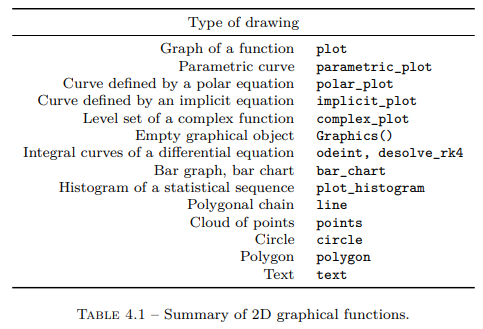

表 4.1 總結了本節中詳述的各種函數。它還包括了方法 `text`，該方法可以在圖形中添加字串，以及方法 `polygon`，用於繪製多邊形。

In [5]:
from sage.features.imagemagick import ImageMagick; ImageMagick().require()

FeatureNotPresentError: imagemagick is not available.
Executable 'convert' not found on PATH.
No equivalent system packages for pip are known to Sage.
Further installation instructions might be available at https://www.imagemagick.org/.

In [6]:
import os
os.environ['PATH'] += ':/opt/homebrew/bin'

In [7]:
from sage.features.imagemagick import ImageMagick; ImageMagick().require()

FeatureNotPresentError: imagemagick is not available.
Executable 'convert' not found on PATH.
No equivalent system packages for pip are known to Sage.
Further installation instructions might be available at https://www.imagemagick.org/.

In [9]:
from sage.features.ffmpeg import FFmpeg; FFmpeg().require()

FeatureNotPresentError: ffmpeg is not available.
Executable 'ffmpeg' not found on PATH.
No equivalent system packages for pip are known to Sage.
Further installation instructions might be available at https://www.ffmpeg.org/.

In [4]:
os.environ['PATH']

'/Applications/SageMath-10-4.app/Contents/Frameworks/sage.framework/Versions/10.4/build/bin:/private/var/tmp/sage-10.4-current/local/var/lib/sage/venv-python3.12.4/bin:/private/var/tmp/sage-10.4-current/local/bin:/var/tmp/sage-10.3-current/local/bin:/var/tmp/sage-10.3-current/venv/bin:/bin:/usr/bin:/usr/local/bin:/Library/TeX/texbin:/opt/homebrew/bin'